In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import tensorflow
import keras
from keras.preprocessing import sequence
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.svm import SVR, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt


In [3]:
import yfinance as yf
import datetime

ticker = 'HDFCBANK.NS'
start_date = datetime.datetime(2022, 1, 1)
end_date = datetime.datetime(2024, 2, 21)

df = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,1485.000000,1523.000000,1480.500000,1519.650024,1485.152466,4534592
2022-01-04,1520.000000,1532.900024,1507.800049,1528.550049,1493.850464,4428676
2022-01-05,1536.800049,1572.000000,1528.099976,1564.849976,1529.326416,7166319
2022-01-06,1543.000000,1554.750000,1530.050049,1539.750000,1504.796143,4814465
2022-01-07,1544.000000,1566.750000,1535.900024,1550.550049,1515.351074,5589692
...,...,...,...,...,...,...
2024-02-14,1376.000000,1391.500000,1363.550049,1384.050049,1384.050049,45660405
2024-02-15,1385.000000,1415.500000,1384.349976,1414.050049,1414.050049,20792472
2024-02-16,1423.900024,1427.699951,1408.449951,1419.900024,1419.900024,16087871


In [5]:
df.shape

(528, 6)

<h1><b>Closing Price Prediction<b></h1>

In [6]:
import math
data=df.filter(['Close'])

#Convert to np array
dataset=data.values

#Get the number of rows to train the model on
#math.ceil to round up

training_data_len = math.ceil(len(dataset)*.8)


#print(dataset)
training_data_len

423

In [7]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.53334085],
       [0.55325588],
       [0.63448196],
       [0.57831731],
       [0.60248391],
       [0.62172754],
       [0.63683159],
       [0.61613344],
       [0.55202507],
       [0.59040061],
       [0.53748043],
       [0.55482212],
       [0.53065553],
       [0.50950996],
       [0.53770414],
       [0.45949882],
       [0.46263156],
       [0.43331829],
       [0.40713804],
       [0.4573729 ],
       [0.48265831],
       [0.5591854 ],
       [0.5237189 ],
       [0.54307452],
       [0.41810252],
       [0.40400529],
       [0.48400084],
       [0.54553587],
       [0.53155063],
       [0.43052124],
       [0.52920128],
       [0.52461401],
       [0.50391587],
       [0.51700599],
       [0.53882296],
       [0.51331383],
       [0.49138515],
       [0.30901769],
       [0.39113888],
       [0.32434545],
       [0.2079883 ],
       [0.20071598],
       [0.19064661],
       [0.09733723],
       [0.10405015],
       [0.20105168],
       [0.2492726 ],
       [0.258

In [8]:
#Create training dataset
#Create scaled training dataset

train_data = scaled_data[0:training_data_len,:]

#Split the data into x_train and y_train data set

x_train=[]
y_train=[]

for i in range(80, len(train_data)):
    x_train.append(train_data[i-80:i,0])
    y_train.append(train_data[i,0])
    if i<=80:
        print(x_train)
        print(y_train)
        print()

[array([0.53334085, 0.55325588, 0.63448196, 0.57831731, 0.60248391,
       0.62172754, 0.63683159, 0.61613344, 0.55202507, 0.59040061,
       0.53748043, 0.55482212, 0.53065553, 0.50950996, 0.53770414,
       0.45949882, 0.46263156, 0.43331829, 0.40713804, 0.4573729 ,
       0.48265831, 0.5591854 , 0.5237189 , 0.54307452, 0.41810252,
       0.40400529, 0.48400084, 0.54553587, 0.53155063, 0.43052124,
       0.52920128, 0.52461401, 0.50391587, 0.51700599, 0.53882296,
       0.51331383, 0.49138515, 0.30901769, 0.39113888, 0.32434545,
       0.2079883 , 0.20071598, 0.19064661, 0.09733723, 0.10405015,
       0.20105168, 0.2492726 , 0.25844714, 0.36081905, 0.31931077,
       0.37334977, 0.44473046, 0.45916311, 0.4762811 , 0.44294024,
       0.36104276, 0.33475052, 0.33900209, 0.3815172 , 0.43779357,
       0.42302521, 0.50279705, 0.8402329 , 0.73159549, 0.60315504,
       0.52685165, 0.52215267, 0.48075637, 0.47482658, 0.41094192,
       0.25542611, 0.13627191, 0.16334754, 0.20821201, 0.1662

In [9]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
#Reshape the data into 3 dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(343, 80, 1)

<h1><b>Model Training<b></h1>

In [11]:
#Build LSTM model
model=Sequential()
#Add first layer to model
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1),activation='relu'))
#Add second layer to model
model.add(LSTM(50, return_sequences=False,activation='relu'))
#Add Dense Layer to model with 25 neurons
model.add(Dense(25))
#Add Dense Layer to model with 1 neuron
model.add(Dense(1))

In [12]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
#Train the model
model.fit(x_train, y_train, batch_size=1,epochs=50)

Epoch 1/50
343/343 [==============================] - 7s 16ms/step - loss: 0.0217
Epoch 2/50
343/343 [==============================] - 6s 16ms/step - loss: 0.0076
Epoch 3/50
343/343 [==============================] - 5s 16ms/step - loss: 0.0057
Epoch 4/50
343/343 [==============================] - 5s 16ms/step - loss: 0.0054
Epoch 5/50
343/343 [==============================] - 6s 16ms/step - loss: 0.0054
Epoch 6/50
343/343 [==============================] - 5s 16ms/step - loss: 0.0040
Epoch 7/50
343/343 [==============================] - 5s 16ms/step - loss: 0.0039
Epoch 8/50
343/343 [==============================] - 5s 16ms/step - loss: 0.0037
Epoch 9/50
343/343 [==============================] - 6s 17ms/step - loss: 0.0037
Epoch 10/50
343/343 [==============================] - 6s 17ms/step - loss: 0.0030
Epoch 11/50
343/343 [==============================] - 5s 16ms/step - loss: 0.0027
Epoch 12/50
343/343 [==============================] - 5s 15ms/step - loss: 0.0027
Epoch 13/50
3

<h1><b>Testing and Validating Model<b></h1>

In [14]:
#Create the test data set
#Create a new array containing scaled values

test_data=scaled_data[training_data_len-80: , : ]
#Create the data sets x_test and y_test

x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(80, len(test_data)):
    x_test.append(test_data[i-80:i,0])

In [15]:
#Convert the data to a numpy array

x_test=np.array(x_test)

In [16]:
#Reshape the data to 3d
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [17]:
#Get the models predicted price values

predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions'] = predictions


4/4 [==============================] - 0s 10ms/step


C:\Users\soham\AppData\Local\Temp\ipykernel_2960\2638059600.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


In [18]:
#Show the valid and predicted prices

valid.tail(20)

,Close,predictions
Date,,
2024-01-23,1427.349976,1486.764038
2024-01-24,1455.900024,1446.362549
2024-01-25,1434.900024,1468.739136
2024-01-29,1454.650024,1450.501099
2024-01-30,1444.300049,1467.879272
2024-01-31,1462.550049,1458.358398
2024-02-01,1466.349976,1475.176025
2024-02-02,1446.150024,1479.361206
2024-02-05,1444.849976,1458.676025


<h1><b>Getting Predictions for 60 days from now<b></h1>

In [19]:
import yfinance as yf
import numpy as np
import pandas as pd

# Assuming you have the necessary imports and the 'model' and 'scaler' objects are defined

# Get the historical stock data
ticker = 'HDFCBANK.NS'  # Replace with your desired ticker
start_date = '2022-01-01'
end_date = '2024-02-21'
stock_quote = yf.download(ticker, start=start_date, end=end_date)

# Extract 'Close' prices
new_df = stock_quote.filter(['Close'])

# Take the last 60 days of 'Close' prices and scale them
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list to store predicted prices and dates
predicted_prices = []
predicted_dates = []

# Number of days to forecast (adjust as needed)
forecast_days = 60

# Loop through the forecast period
for i in range(forecast_days):
    # Reshape the data for prediction
    X_test = np.array([last_60_days_scaled])
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Get predicted scaled price
    pred_price = model.predict(X_test)

    # Undo the scaling
    pred_price = scaler.inverse_transform(pred_price)

    # Append the predicted price to the list
    predicted_prices.append(pred_price[0, 0])

    # Get the corresponding date for the prediction
    next_date = stock_quote.index[-1] + pd.DateOffset(days=i + 1)
    predicted_dates.append(next_date)

    # Update last_60_days for the next iteration
    last_60_days = np.append(last_60_days[1:], [pred_price[0]], axis=0)
    last_60_days_scaled = scaler.transform(last_60_days)

# Create a DataFrame to display the results
predicted_df = pd.DataFrame({'Date': predicted_dates, 'Predicted_Close_Price': predicted_prices})



# Save the predicted results to a CSV file with the ticker in the name
csv_filename = f'pred.lstm.{ticker}.csv'
predicted_df.to_csv(csv_filename, index=False)

print(f'Predicted prices saved to {csv_filename}')


[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 18ms/step
Predicted prices saved to pred.lstm.HDFCBANK.NS.csv


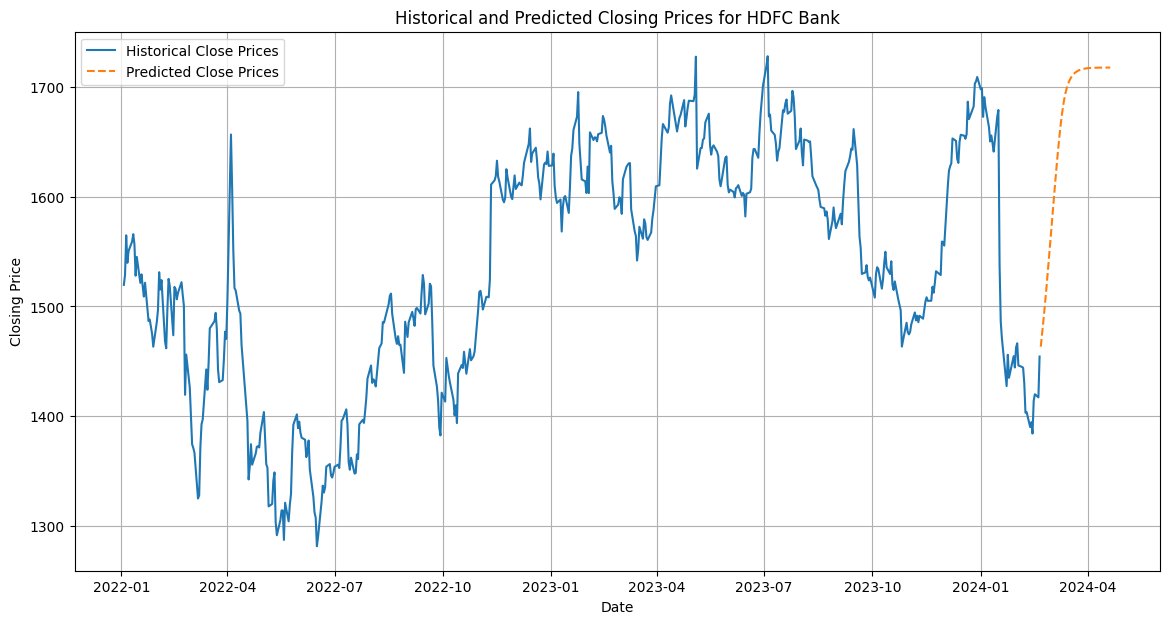

In [22]:
import matplotlib.pyplot as plt

# Plotting historical data
plt.figure(figsize=(14, 7))
plt.plot(stock_quote.index, stock_quote['Close'], label='Historical Close Prices')

# Plotting predicted data
plt.plot(predicted_df['Date'], predicted_df['Predicted_Close_Price'], label='Predicted Close Prices', linestyle='--')

# Adding labels and title
plt.title('Historical and Predicted Closing Prices for HDFC Bank')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()
